In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# Importing libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [23]:
# Loading the dataset from google drive
df = pd.read_csv('/content/drive/My Drive/post_eda_numerical_dataset1.csv')


In [24]:
# Setting features and target variable
X = df.drop('avg_price_per_room', axis=1)
y = df['avg_price_per_room'].values.reshape(-1, 1)

In [25]:
# Randomly split training data and test data with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

# Feature Scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
# Model architecture - Relu used as activation function, 4 hidden layers, Stochastic Gradient Descent optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_shape=[X_train.shape[1]]))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(1))
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-4), 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (X_test, y_test))


Epoch 1/100
396/396 - 3s - loss: 1523.4475 - val_loss: 576.3418 - 3s/epoch - 6ms/step
Epoch 2/100
396/396 - 2s - loss: 477.0230 - val_loss: 476.1852 - 2s/epoch - 5ms/step
Epoch 3/100
396/396 - 1s - loss: 447.8934 - val_loss: 576.8058 - 927ms/epoch - 2ms/step
Epoch 4/100
396/396 - 1s - loss: 430.3199 - val_loss: 417.8924 - 980ms/epoch - 2ms/step
Epoch 5/100
396/396 - 1s - loss: 413.9915 - val_loss: 394.9764 - 919ms/epoch - 2ms/step
Epoch 6/100
396/396 - 1s - loss: 409.8192 - val_loss: 389.5421 - 1s/epoch - 3ms/step
Epoch 7/100
396/396 - 2s - loss: 392.3267 - val_loss: 439.7425 - 2s/epoch - 5ms/step
Epoch 8/100
396/396 - 2s - loss: 393.7378 - val_loss: 404.2983 - 2s/epoch - 4ms/step
Epoch 9/100
396/396 - 1s - loss: 374.8782 - val_loss: 383.4065 - 1s/epoch - 3ms/step
Epoch 10/100
396/396 - 1s - loss: 370.9686 - val_loss: 413.8062 - 1s/epoch - 3ms/step
Epoch 11/100
396/396 - 1s - loss: 373.8975 - val_loss: 417.9455 - 978ms/epoch - 2ms/step
Epoch 12/100
396/396 - 1s - loss: 377.4963 - val_l

In [28]:
# Predict Price
prediction = model.predict(X_test)


339/339 [==============================] - 2s 6ms/step


In [29]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, prediction)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)

# Printing the values
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 361.3828255431805
RMSE: 19.010071686955325
MAE: 13.092309341364732


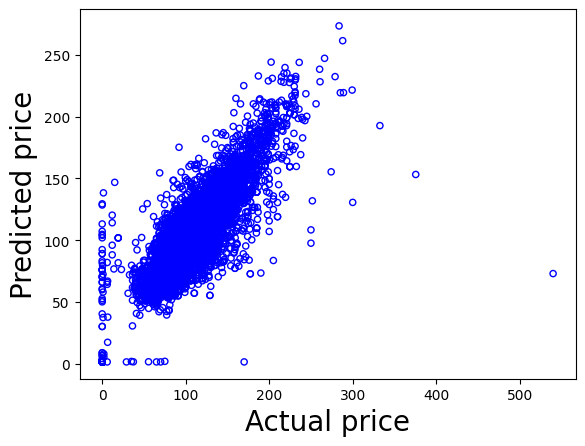

In [30]:
# Visualization
plt.scatter(y_test, prediction, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()